<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_3%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기계학습론 3주차 과제

## 라이브러리 & 데이터 셋 불러오기

In [196]:
import numpy as np
import pandas as pd
from sklearn.datasets import  load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
#df = pd.read_csv('/content/iris.csv')

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [198]:
df.shape

(150, 4)

## 데이터 라벨링

In [199]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(iris.target_names)

le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [200]:
df['classlabel'] = le.inverse_transform(iris.target)

In [201]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classlabel
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## EDA

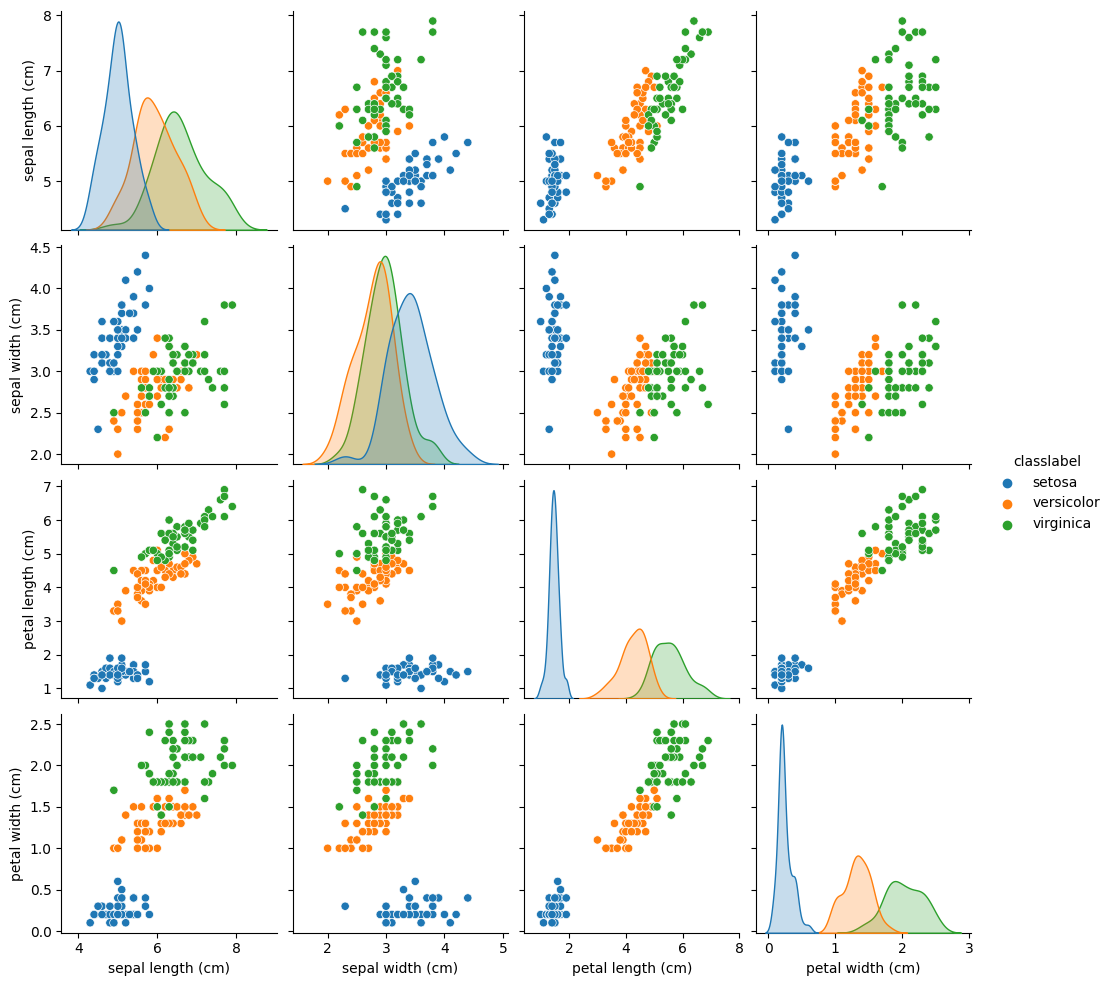

In [202]:
sns.pairplot(df, hue='classlabel')

In [203]:
X = iris.data[:,2:]
y = iris.target

## 데이터 셋 분리

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,
                                                 random_state = 13,stratify=y)

In [205]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## 모델 학습

In [206]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2, random_state=13)

In [207]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

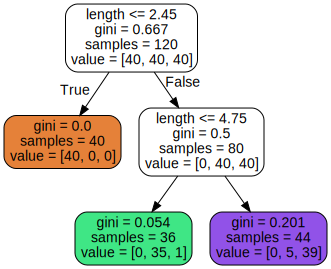

In [208]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(tree_model,feature_names=['length','width'],rounded=True,filled=True))

In [209]:
# tree_model.feature_importances_

## 모델 평가

In [210]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_train)
accuracy_score(y_train,y_pred)

0.95

In [211]:
y_pred_test = tree_model.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.9666666666666667

In [212]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

confusion_matrix(y_test,y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [213]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')

  if test_idx:
    # 모든 샘플 그리기
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0],X_test[:, 1],facecolor='none',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100, label='test set')

<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


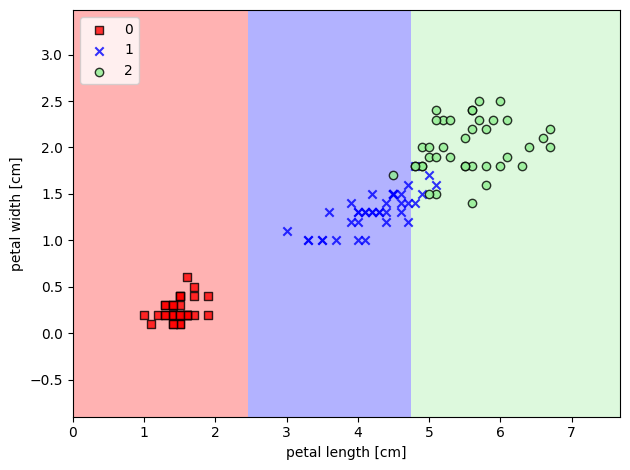

In [214]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 하이퍼 파라미터 조정

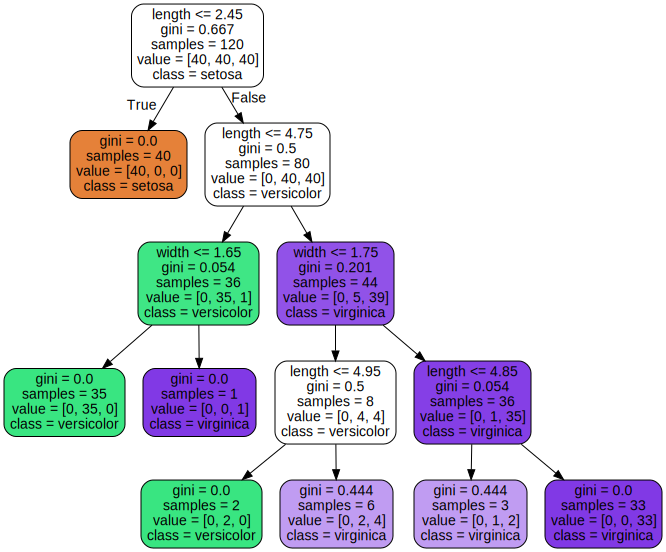

In [215]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=13)

tree_model.fit(X_train,y_train)

Source(export_graphviz(tree_model,feature_names=['length','width'],class_names=iris.target_names,
                       rounded=True,filled=True))

In [216]:
y_pred = tree_model.predict(X_train)
print(accuracy_score(y_train,y_pred))

y_pred_test = tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.975
1.0


<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


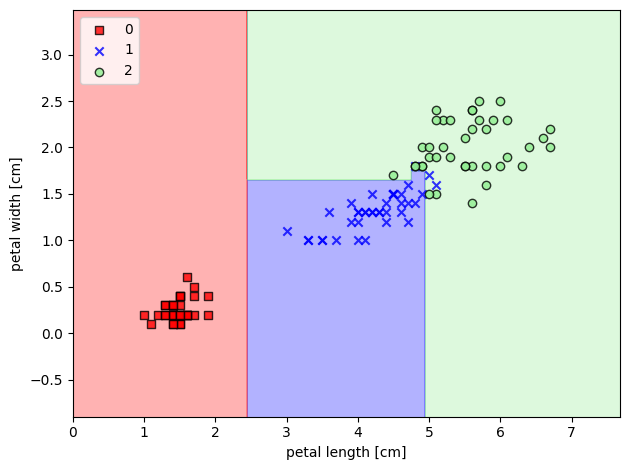

In [217]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### case 1)

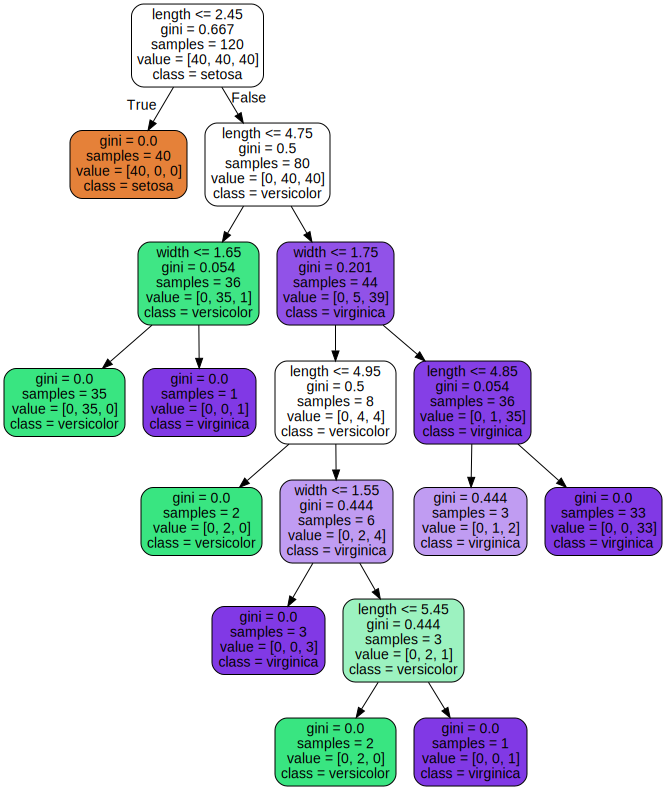

In [218]:
tree_model = DecisionTreeClassifier(max_depth=6, random_state=13)

tree_model.fit(X_train,y_train)

Source(export_graphviz(tree_model,feature_names=['length','width'],class_names=iris.target_names,
                       rounded=True,filled=True))

In [219]:
y_pred = tree_model.predict(X_train)
print(accuracy_score(y_train,y_pred))

y_pred_test = tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.9916666666666667
1.0


<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


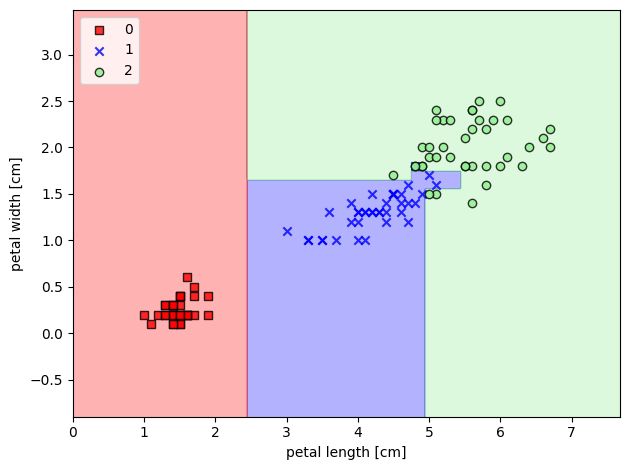

In [220]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### case 2)

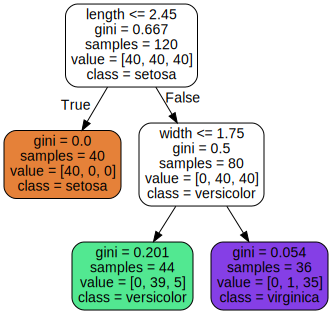

In [221]:
tree_model = DecisionTreeClassifier(max_depth=2, random_state=37)

tree_model.fit(X_train,y_train)

Source(export_graphviz(tree_model,feature_names=['length','width'],class_names=iris.target_names,
                       rounded=True,filled=True))

In [222]:
y_pred = tree_model.predict(X_train)
print(accuracy_score(y_train,y_pred))

y_pred_test = tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.95
1.0


<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


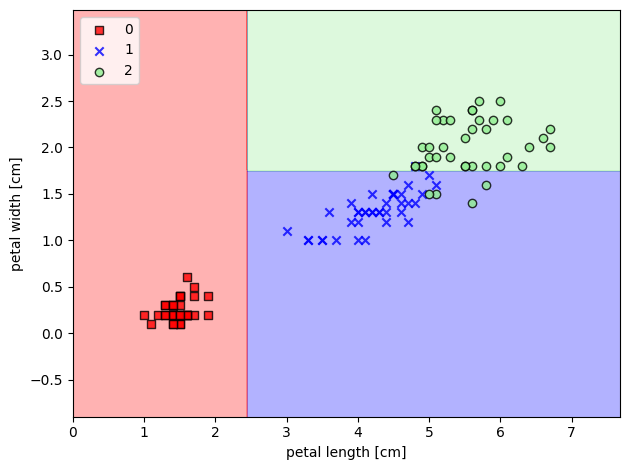

In [223]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### case 3)

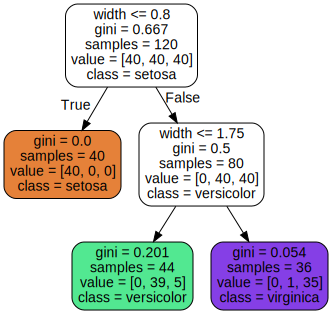

In [224]:
tree_model = DecisionTreeClassifier(max_depth=2, random_state=1)

tree_model.fit(X_train,y_train)

Source(export_graphviz(tree_model,feature_names=['length','width'],class_names=iris.target_names,
                       rounded=True,filled=True))

In [225]:
y_pred = tree_model.predict(X_train)
print(accuracy_score(y_train,y_pred))

y_pred_test = tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.95
1.0


<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


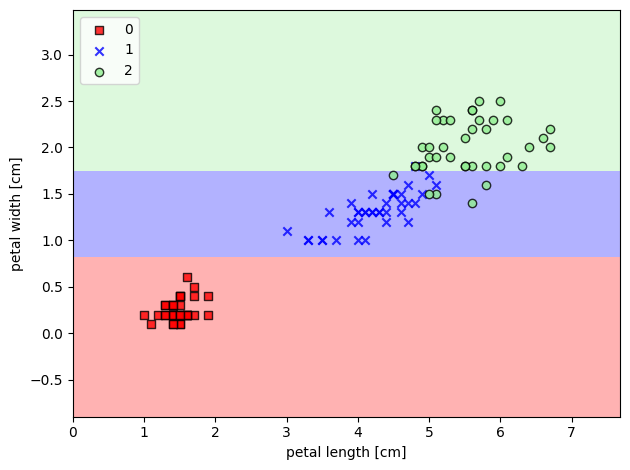

In [226]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### case 4)

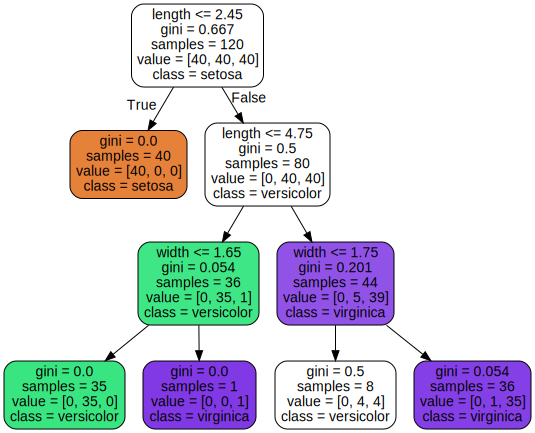

In [227]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=13)

tree_model.fit(X_train,y_train)

Source(export_graphviz(tree_model,feature_names=['length','width'],class_names=iris.target_names,
                       rounded=True,filled=True))

In [228]:
y_pred = tree_model.predict(X_train)
print(accuracy_score(y_train,y_pred))

y_pred_test = tree_model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.9583333333333334
1.0


<ipython-input-213-77c84df0d813>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')


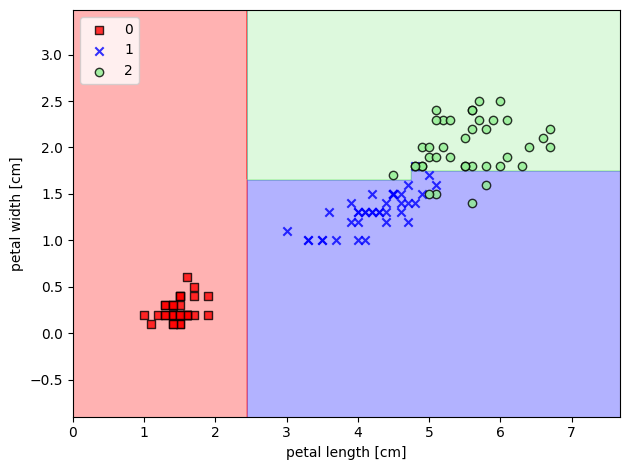

In [229]:
plot_decision_regions(X=X_train, y=y_train, classifier=tree_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()